In [10]:
import os
import json

import torch
import matplotlib.pyplot as plt
import pandas as pd

import tqdm

from model import FRCNNDetector, DetectedImage
import dataset as DS

In [11]:
classes = ['1', '2', '3', '4', '5', 'blue', 'brown', 'green', 'red', 'yellow', 'parking', 'limit_h', 'limit_speed' ,'14', '15']
model_path = "./saved_models/fasterrcnn_20231119.pt-35"
detector = FRCNNDetector(classes, model_path=model_path)

In [12]:
data_set_path = "./all_data/val"
# test_loader = DS.load_dataset(data_set_path, "target_2048_2448.json")
test_loader = DS.load_dataset(data_set_path, "target_2452_2056.json", batch_size=6)

In [13]:
gts = []
predicts = []
count = 0
with torch.no_grad():
    detector.eval()
    for images, targets in tqdm.tqdm(test_loader):

        for target in targets:
            n_boxes = len(target["boxes"])
            target["scores"] = torch.Tensor([1.]*n_boxes)

        gts.extend(
            [DetectedImage(image, out, classes=classes) for image, out in zip(images, targets)]
        )
        result = detector(images)
        predicts.extend(detector.predict(images))
        # print(detector(images))
        
        count += 1
        if count==1:
            break
        

  0%|          | 0/183 [00:05<?, ?it/s]


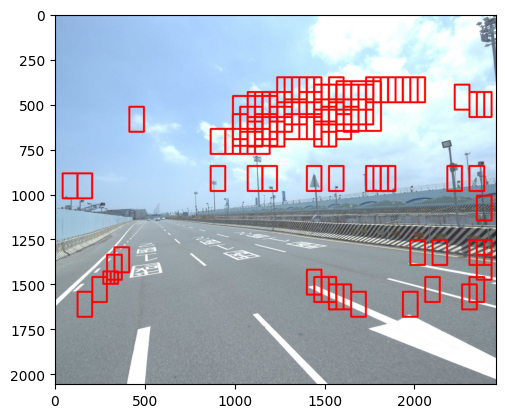

In [7]:
detected_image = predicts[0]
img = detected_image.draw_box("green", thickness=10, score_thr=.7)
plt.imshow(img)

In [14]:
detected_image._info

,label,score,x0,y0,x1,y1
0,green,0.922982,1646,392,1728,531
1,green,0.922802,1153,556,1234,695
2,green,0.92278,1194,515,1275,654
3,green,0.922767,1317,474,1399,613
4,green,0.922752,1605,392,1687,531
...,...,...,...,...,...,...
95,green,0.86274,1811,844,1892,983
96,green,0.861244,1112,638,1193,777
97,green,0.860222,1194,597,1275,736
98,green,0.860103,1482,392,1563,531


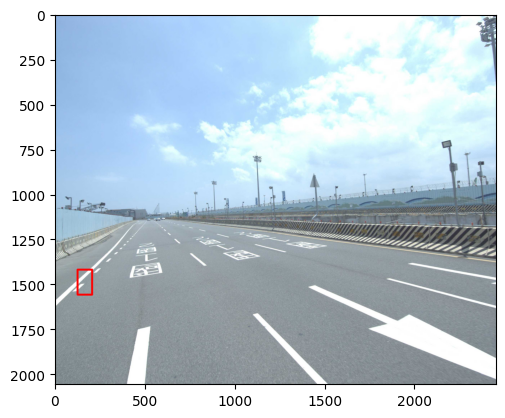

In [18]:
tmp = detected_image.nms_filtering(.1)
img = tmp.draw_box("blue", thickness=10, score_thr=.7)
plt.imshow(img)

140674809952672
140674809952672


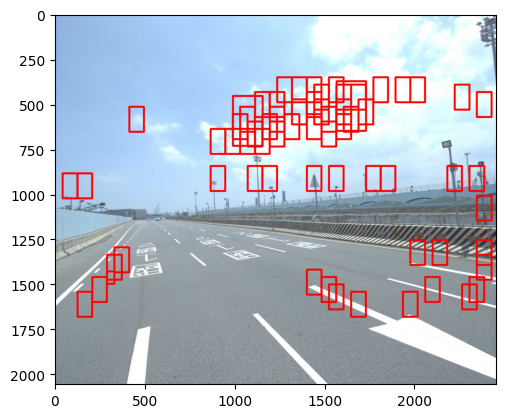

In [8]:
tmp = detected_image.nms_filtering(.3)
print(id(tmp._ref_image))
print(id(detected_image._ref_image))
img = tmp.draw_box("green", thickness=10, score_thr=.7)
plt.imshow(img)

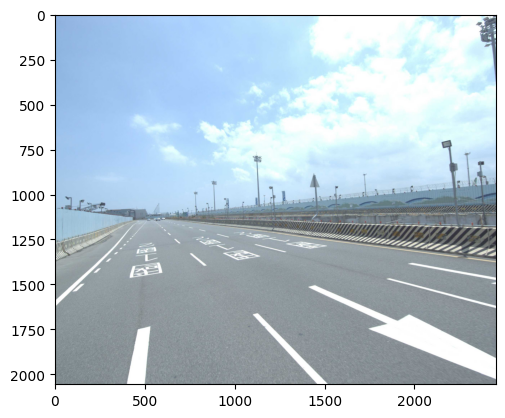

In [9]:
img = gts[0].draw_box("green", thickness=10)
plt.imshow(img)